# irisデータセットをSVMで分類する
https://qiita.com/kazuki_hayakawa/items/18b7017da9a6f73eba77

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

RANDOM_SEED=71

# データの前処理

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler 

iris = datasets.load_iris()

# print(iris.feature_names)
# ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# petal length, petal widthを使う
X = iris.data[:, [2,3]]
y = iris.target

# トレーニングデータとテストデータに分割。
# 今回は訓練データを70%、テストデータは30%としている。
# 乱数を制御するパラメータ random_state は None にすると毎回異なるデータを生成する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

/Users/rd_bigdata01/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# モデルの学習

In [9]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
model = SVC(kernel='linear', random_state=RANDOM_SEED) # 線形カーネル
#model = SVC(kernel='poly', degree=3, random_state=RANDOM_SEED) # 多項式カーネル
#model = SVC(kernel='rbf', random_state=RANDOM_SEED) # RBFカーネル

from sklearn.linear_model import LogisticRegression
# ロジスティック回帰のインスタンスを生成
#model = LogisticRegression(random_state=RANDOM_SEED)

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=71, shrinking=True,
  tol=0.001, verbose=False)

# モデルの精度を評価する

In [10]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

トレーニングデータに対する正解率： 0.96
テストデータに対する正解率： 0.96


# 分類結果の可視化
* mlxtendというツールの機能を使って可視化している
* https://qiita.com/altescy/items/60a6def66f13267f6347

model : SVC


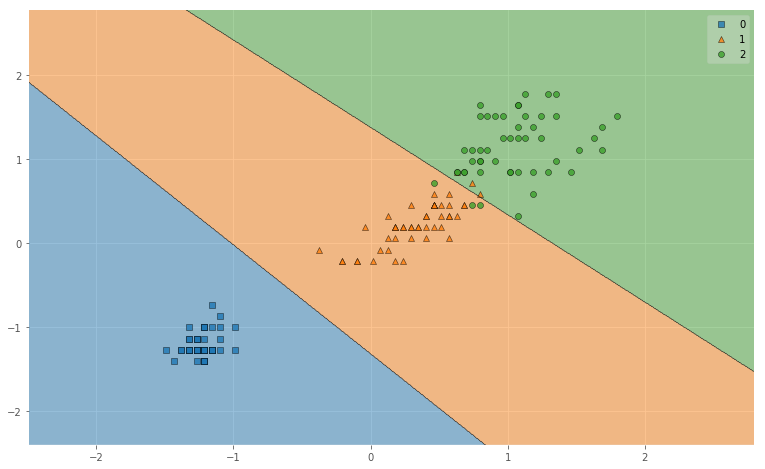

In [11]:
#分類結果を図示する
import matplotlib.pyplot as plt

# scikit-laernやmatplotlibに含まれない機能を含むPythonライブラリ
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

#配列データの結合（教師データ＋試験データ）
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# 可視化
fig = plt.figure(figsize=(13,8))

# model名の取得
# <class 'sklearn.linear_model.logistic.LogisticRegression'>
# -> LogisticRegression
model_title = str(type(model)).split(".")[-1][:-2]#[:-len("Classifier")]
print("model : " + model_title)

# 分類器の決定境界を引いてくれる神機能(mlxtendに含まれる機能の１つ)
# データとターゲット，分類器を渡すだけで描いてくれる
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()